Goal : Predict rain sum (mm)

# Library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [43]:
train_data = pd.read_csv('train.csv')
train_h_data = pd.read_csv('train_hourly.csv')
test_data = pd.read_csv('test.csv')
test_h_data = pd.read_csv('test_hourly.csv')

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13258 entries, 0 to 13257
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             13258 non-null  object 
 1   temperature_2m_max (°C)          13208 non-null  float64
 2   temperature_2m_min (°C)          13208 non-null  float64
 3   apparent_temperature_max (°C)    13208 non-null  float64
 4   apparent_temperature_min (°C)    13208 non-null  float64
 5   sunrise (iso8601)                13258 non-null  object 
 6   sunset (iso8601)                 13258 non-null  object 
 7   shortwave_radiation_sum (MJ/m²)  13198 non-null  float64
 8   rain_sum (mm)                    13198 non-null  float64
 9   snowfall_sum (cm)                13198 non-null  float64
 10  windspeed_10m_max (km/h)         13208 non-null  float64
 11  windgusts_10m_max (km/h)         13208 non-null  float64
 12  winddirection_10m_

In [45]:
train_h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318192 entries, 0 to 318191
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                318192 non-null  object 
 1   temperature_2m (°C)                 318022 non-null  float64
 2   relativehumidity_2m (%)             318022 non-null  float64
 3   dewpoint_2m (°C)                    318022 non-null  float64
 4   apparent_temperature (°C)           318022 non-null  float64
 5   pressure_msl (hPa)                  318022 non-null  float64
 6   surface_pressure (hPa)              318022 non-null  float64
 7   snowfall (cm)                       318022 non-null  float64
 8   cloudcover (%)                      318022 non-null  float64
 9   cloudcover_low (%)                  318022 non-null  float64
 10  cloudcover_mid (%)                  318022 non-null  float64
 11  cloudcover_high (%)       

In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               4972 non-null   int64  
 1   time                             4972 non-null   object 
 2   temperature_2m_max (°C)          4972 non-null   float64
 3   temperature_2m_min (°C)          4972 non-null   float64
 4   apparent_temperature_max (°C)    4972 non-null   float64
 5   apparent_temperature_min (°C)    4972 non-null   float64
 6   sunrise (iso8601)                4972 non-null   object 
 7   sunset (iso8601)                 4972 non-null   object 
 8   shortwave_radiation_sum (MJ/m²)  4972 non-null   float64
 9   snowfall_sum (cm)                4972 non-null   float64
 10  windspeed_10m_max (km/h)         4972 non-null   float64
 11  windgusts_10m_max (km/h)         4972 non-null   float64
 12  winddirection_10m_do

In [47]:
test_h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119328 entries, 0 to 119327
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                119328 non-null  object 
 1   temperature_2m (°C)                 119328 non-null  float64
 2   relativehumidity_2m (%)             119328 non-null  float64
 3   dewpoint_2m (°C)                    119328 non-null  float64
 4   apparent_temperature (°C)           119328 non-null  float64
 5   pressure_msl (hPa)                  119328 non-null  float64
 6   surface_pressure (hPa)              119328 non-null  float64
 7   snowfall (cm)                       119328 non-null  float64
 8   cloudcover (%)                      119328 non-null  float64
 9   cloudcover_low (%)                  119328 non-null  float64
 10  cloudcover_mid (%)                  119328 non-null  float64
 11  cloudcover_high (%)       

hanya data hourly mengenai winddirection_100m yang memiliki Null

In [48]:
train_data['time'].nunique()

1418

In [49]:
train_data

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,6.9,20.2,277.0,3.61,0,su
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,7.1,18.0,168.0,4.11,0,su
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,8.1,21.2,125.0,4.23,0,su
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,7.2,21.6,190.0,4.22,0,su
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,6.9,21.2,241.0,4.16,0,su
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13253,2022-12-24,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q
13254,2022-12-25,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q
13255,2022-12-26,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q
13256,2022-12-27,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q


# Data Cleansing

<AxesSubplot:>

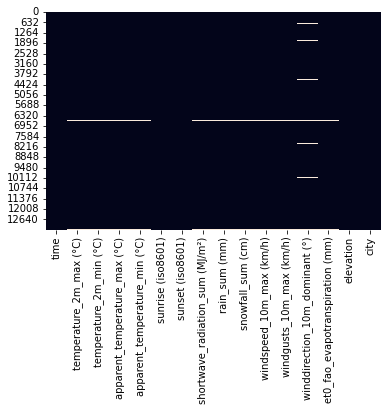

In [50]:
sns.heatmap(train_data.isnull(), cbar=False)

<AxesSubplot:>

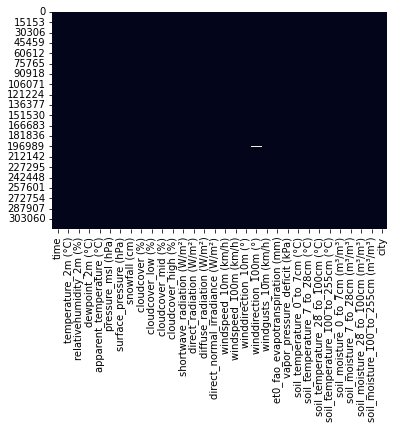

In [51]:
sns.heatmap(train_h_data.isnull(), cbar=False)

In [52]:
train_data = pd.read_csv('train.csv')
train_h_data = pd.read_csv('train_hourly.csv')
test_data = pd.read_csv('test.csv')
test_h_data = pd.read_csv('test_hourly.csv')

train_h_grouped_data = train_h_data.copy()

train_h_grouped_data["time"] = pd.to_datetime(train_h_grouped_data["time"]).dt.date
train_h_grouped_data["time"] = train_h_grouped_data["time"].apply(str) 

train_h_avg_data = train_h_grouped_data.groupby(['time', 'city']).mean().reset_index().copy()
train_h_max_data = train_h_grouped_data.groupby(['time', 'city']).max().reset_index().copy()
train_h_min_data = train_h_grouped_data.groupby(['time', 'city']).min().reset_index().copy()
train_h_sum_data = train_h_grouped_data.groupby(['time', 'city']).sum().reset_index().copy()
# train_h_wind_mode_data = train_h_grouped_data.groupby(['time', 'city'])['winddirection_10m (°)'].agg(lambda x: pd.Series.mode(x)[0]).reset_index().rename(columns={'winddirection_10m (°)': 'winddirection_10m_dominant (°)'})

train_h_max_data = train_h_max_data.add_prefix('max_').rename(columns={'max_city': 'city', 'max_time': 'time'})
train_h_min_data = train_h_min_data.add_prefix('min_').rename(columns={'min_city': 'city', 'min_time': 'time'})
train_h_avg_data = train_h_avg_data.add_prefix('avg_').rename(columns={'avg_city': 'city', 'avg_time': 'time'})
train_h_sum_data = train_h_sum_data.add_prefix('sum_').rename(columns={'sum_city': 'city', 'sum_time': 'time'})

In [53]:
cleaned_train = train_data.merge(train_h_max_data, on=['city', 'time'])
cleaned_train = cleaned_train.merge(train_h_min_data, on=['city', 'time'])
cleaned_train = cleaned_train.merge(train_h_avg_data, on=['city', 'time'])
cleaned_train = cleaned_train.merge(train_h_sum_data, on=['city', 'time'])
# cleaned_train = cleaned_train.merge(train_h_wind_mode_data, on=['city', 'time'])

cleaned_train = cleaned_train.drop([
    'temperature_2m_max (°C)',
    'temperature_2m_min (°C)',
    'apparent_temperature_max (°C)',
    'apparent_temperature_min (°C)',
    'snowfall_sum (cm)',
    'windspeed_10m_max (km/h)',
    'windgusts_10m_max (km/h)',
    'shortwave_radiation_sum (MJ/m²)',
], axis = 1).rename(columns={'winddirection_10m_dominant (°)_y': 'winddirection_10m_dominant (°)'}).dropna(subset=['rain_sum (mm)'])

Note: 

Semua suffix \_max, \_min, dan \_sum diubah menjadi prefix max_, min_, dan sum_ 

Contoh : 

temperature_2m_max (°C) -> max_temperature_2m (°C)


In [54]:
[i for i in cleaned_train.columns]

['time',
 'sunrise (iso8601)',
 'sunset (iso8601)',
 'rain_sum (mm)',
 'winddirection_10m_dominant (°)',
 'et0_fao_evapotranspiration (mm)',
 'elevation',
 'city',
 'max_temperature_2m (°C)',
 'max_relativehumidity_2m (%)',
 'max_dewpoint_2m (°C)',
 'max_apparent_temperature (°C)',
 'max_pressure_msl (hPa)',
 'max_surface_pressure (hPa)',
 'max_snowfall (cm)',
 'max_cloudcover (%)',
 'max_cloudcover_low (%)',
 'max_cloudcover_mid (%)',
 'max_cloudcover_high (%)',
 'max_shortwave_radiation (W/m²)',
 'max_direct_radiation (W/m²)',
 'max_diffuse_radiation (W/m²)',
 'max_direct_normal_irradiance (W/m²)',
 'max_windspeed_10m (km/h)',
 'max_windspeed_100m (km/h)',
 'max_winddirection_10m (°)',
 'max_winddirection_100m (°)',
 'max_windgusts_10m (km/h)',
 'max_et0_fao_evapotranspiration (mm)',
 'max_vapor_pressure_deficit (kPa)',
 'max_soil_temperature_0_to_7cm (°C)',
 'max_soil_temperature_7_to_28cm (°C)',
 'max_soil_temperature_28_to_100cm (°C)',
 'max_soil_temperature_100_to_255cm (°C)',
 '

In [55]:
cleaned_train

,time,sunrise (iso8601),sunset (iso8601),rain_sum (mm),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city,max_temperature_2m (°C),max_relativehumidity_2m (%),...,sum_et0_fao_evapotranspiration (mm),sum_vapor_pressure_deficit (kPa),sum_soil_temperature_0_to_7cm (°C),sum_soil_temperature_7_to_28cm (°C),sum_soil_temperature_28_to_100cm (°C),sum_soil_temperature_100_to_255cm (°C),sum_soil_moisture_0_to_7cm (m³/m³),sum_soil_moisture_7_to_28cm (m³/m³),sum_soil_moisture_28_to_100cm (m³/m³),sum_soil_moisture_100_to_255cm (m³/m³)
0,2018-01-01,2018-01-01T05:15,2018-01-01T17:49,7.7,277.0,3.61,0,su,29.0,94.0,...,3.61,11.10,684.7,686.2,688.8,702.5,7.150,7.207,6.784,6.720
1,2018-01-02,2018-01-02T05:15,2018-01-02T17:50,9.4,168.0,4.11,0,su,29.5,94.0,...,4.11,12.35,689.0,687.3,688.9,700.8,7.577,7.494,6.891,6.720
2,2018-01-03,2018-01-03T05:16,2018-01-03T17:50,7.8,125.0,4.23,0,su,30.4,95.0,...,4.23,14.51,694.9,692.0,689.7,700.8,7.174,7.314,7.003,6.732
3,2018-01-04,2018-01-04T05:16,2018-01-04T17:50,29.7,190.0,4.22,0,su,30.0,96.0,...,4.22,11.62,698.2,695.4,691.5,700.8,7.726,7.623,7.082,6.745
4,2018-01-05,2018-01-05T05:17,2018-01-05T17:51,22.5,241.0,4.16,0,su,29.9,96.0,...,4.16,13.00,693.5,693.8,692.6,700.8,7.811,8.088,7.545,6.787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13247,2021-07-30,1970-01-01T07:00,1970-01-01T07:00,2.8,54.0,1.26,0,q,9.4,76.0,...,1.26,7.10,199.3,183.3,88.6,-74.8,3.721,4.872,5.928,6.072
13248,2021-07-31,1970-01-01T07:00,1970-01-01T07:00,2.1,352.0,1.20,0,q,8.7,81.0,...,1.20,5.49,212.6,177.2,88.8,-70.7,4.095,4.872,5.928,6.072
13249,2021-08-01,1970-01-01T07:00,1970-01-01T07:00,0.0,335.0,1.49,0,q,7.1,81.0,...,1.49,4.74,239.2,192.9,90.8,-66.7,3.740,4.851,5.928,6.072
13250,2021-08-02,1970-01-01T07:00,1970-01-01T07:00,0.0,NaN,1.71,0,q,9.1,88.0,...,1.71,4.87,241.4,203.1,94.9,-63.0,3.227,4.848,5.928,6.072


In [56]:
cleaned_train.isnull().sum()

time                                        0
sunrise (iso8601)                           0
sunset (iso8601)                            0
rain_sum (mm)                               0
winddirection_10m_dominant (°)            406
                                         ... 
sum_soil_temperature_100_to_255cm (°C)      0
sum_soil_moisture_0_to_7cm (m³/m³)          0
sum_soil_moisture_7_to_28cm (m³/m³)         0
sum_soil_moisture_28_to_100cm (m³/m³)       0
sum_soil_moisture_100_to_255cm (m³/m³)      0
Length: 128, dtype: int64

# Exploratory Data Analysis

In [86]:
train_drop = train_data.drop([
    'temperature_2m_max (°C)',
    'temperature_2m_min (°C)',
    'apparent_temperature_max (°C)',
    'apparent_temperature_min (°C)',
    'snowfall_sum (cm)',
    'windspeed_10m_max (km/h)',
    'windgusts_10m_max (km/h)',
    'shortwave_radiation_sum (MJ/m²)',
], axis = 1).rename(columns={'winddirection_10m_dominant (°)_y': 'winddirection_10m_dominant (°)'}).dropna(subset=['rain_sum (mm)'])

cleaned_train_max = train_drop.merge(train_h_max_data, on=['city', 'time'])
cleaned_train_min = train_drop.merge(train_h_min_data, on=['city', 'time'])
cleaned_train_avg = train_drop.merge(train_h_avg_data, on=['city', 'time'])
cleaned_train_sum = train_drop.merge(train_h_sum_data, on=['city', 'time'])

### Study of Relationship Between Variables

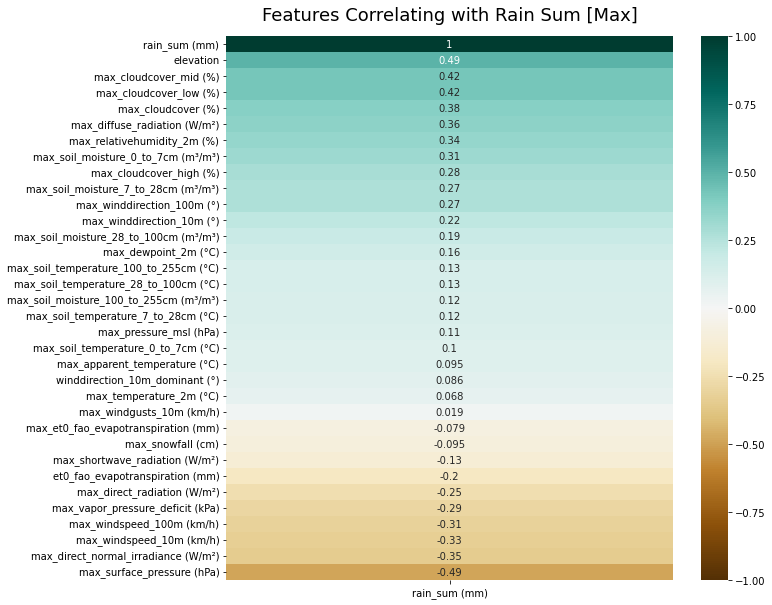

In [97]:
fig, ax = plt.subplots(figsize=(10,10)) 

heatmap = sns.heatmap(cleaned_train_max.corr()[['rain_sum (mm)']].sort_values(by='rain_sum (mm)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
heatmap.set_title('Features Correlating with Rain Sum [Max]', fontdict={'fontsize':18}, pad=16);

Potential feature: `elevation`, `max_cloudcover_mid`, `max_cloudcover_low`, `max_surface_pressure`

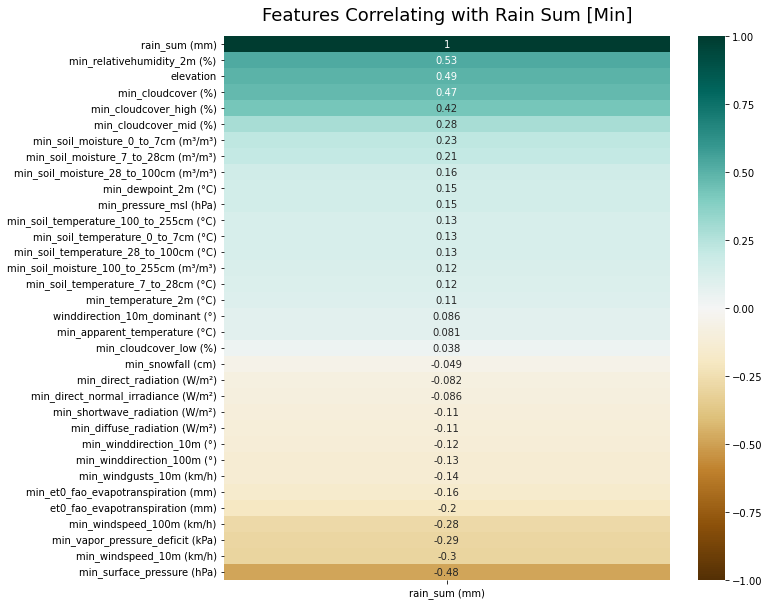

In [96]:
fig, ax = plt.subplots(figsize=(10,10)) 

heatmap = sns.heatmap(cleaned_train_min.corr()[['rain_sum (mm)']].sort_values(by='rain_sum (mm)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
heatmap.set_title('Features Correlating with Rain Sum [Min]', fontdict={'fontsize':18}, pad=16);

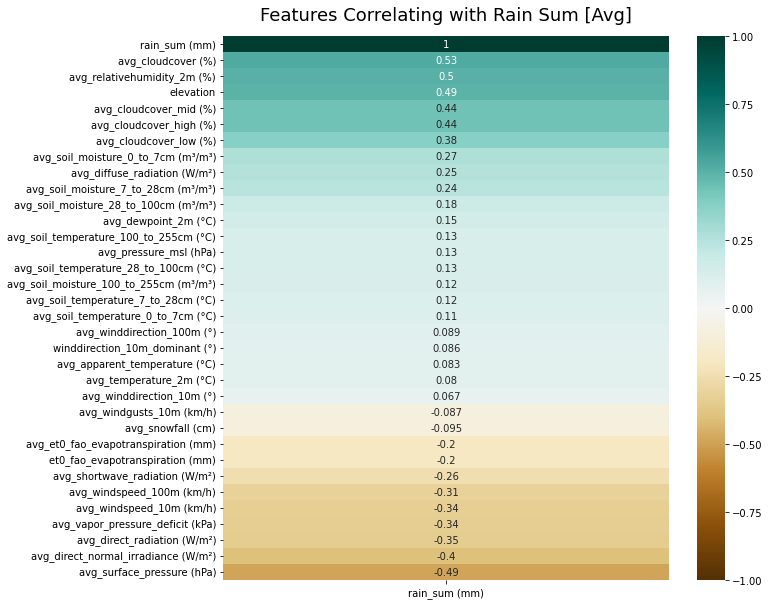

In [99]:
fig, ax = plt.subplots(figsize=(10,10)) 

heatmap = sns.heatmap(cleaned_train_avg.corr()[['rain_sum (mm)']].sort_values(by='rain_sum (mm)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
heatmap.set_title('Features Correlating with Rain Sum [Avg]', fontdict={'fontsize':18}, pad=16);

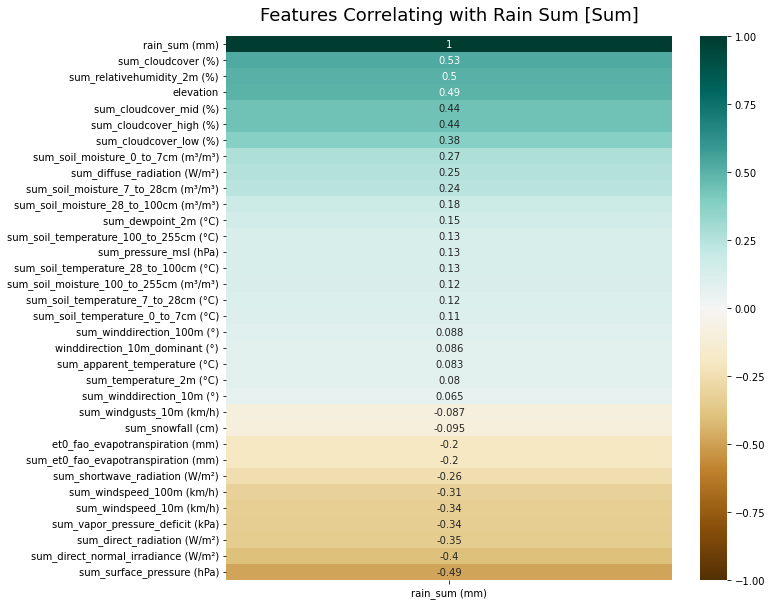

In [98]:
fig, ax = plt.subplots(figsize=(10,10)) 

heatmap = sns.heatmap(cleaned_train_sum.corr()[['rain_sum (mm)']].sort_values(by='rain_sum (mm)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
heatmap.set_title('Features Correlating with Rain Sum [Sum]', fontdict={'fontsize':18}, pad=16);

# Modelling